<a href="https://colab.research.google.com/github/Rosilanny/Projetos_Data_Science/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_(Paris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Paris

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Paris  (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/france/ile-de-france/paris/2023-03-13/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, foi disponibilizado [aqui](https://drive.google.com/file/d/1BmxCWdIq02NlOlYYywSVt-W5E-Lz84KR/view?usp=share_link) o conjunto que utilizamos, para que seja possível rodar o código desse projeto.



In [4]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # para criar o mapa de calor

%matplotlib inline

In [5]:
# importando o arquivo listings.csv  para um DataFrame e atribuindo  ao df_paris
df_paris = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2023-03-13/visualisations/listings.csv")

## Análise dos Dados

Esta etapa é uma etapara crucial para se criar uma consciência situacional inicial e permitir um entendimento de como os dados estão organizados.


**Dicionário das variáveis**

* `id` - número de identificação gerado para o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação do proprietário da propriedade
* `host_name` - Nome do proprietário
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - Tipo de quarto oferecido
* `price` - preço do aluguel do imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Após entender todos as variáveis é importante conhecer o *dataset*, e isso será feito analisando as 5 primeiras entradas.

In [6]:
# Código para mostrar as 5 primeiras entradas
df_paris.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,124,15,332,2023-02-18,1.99,1,184,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,130,10,329,2023-03-15,2.26,2,171,30,7510400829623
2,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,140,4,6,2015-09-14,0.04,1,48,0,7510903576564
3,81870,Saint Germain Musee d'orsay,152242,Delphine,NaN,Luxembourg,48.85558,2.33119,Entire home/apt,145,365,1,2012-01-07,0.01,79,0,0,NaN
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,264,0,"Available with a mobility lease only (""bail mo..."


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Calculando o volume de dados por meio da obtenção da quantidade de linhas (entradas) e colunas (variáveis).

In [8]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_paris.shape[0]))
print("Variáveis:\t {}\n".format(df_paris.shape[1]))

# verificar a qualificação do tipo das variáveis
display(df_paris.dtypes)

Entradas:	 56726
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Pelo resultado é possível notar que das 18 variáveis apenas 12 são numéricas e que tem-se uma entrada de quase 57 mil alugueis realizados   

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Tendo em vista que a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. Logo torna-se importante obter a porcentagem de valores nulos e verificar se eles são significativos comparados ao total de entradas.

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df_paris.isnull().sum() / df_paris.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            32.900257
reviews_per_month                  19.558932
last_review                        19.558932
name                                0.065226
host_name                           0.031731
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Com base nos números acima tem se que : 
* A variável `license` possue valor nulo em quase  33% das linhas.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase  20% das linhas.
* As variáveis `name` e `host_name` têm menos de 0,1% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar se as distribuições das variáveis é contínua ou discreta plotou-se os histogramas abaixo:

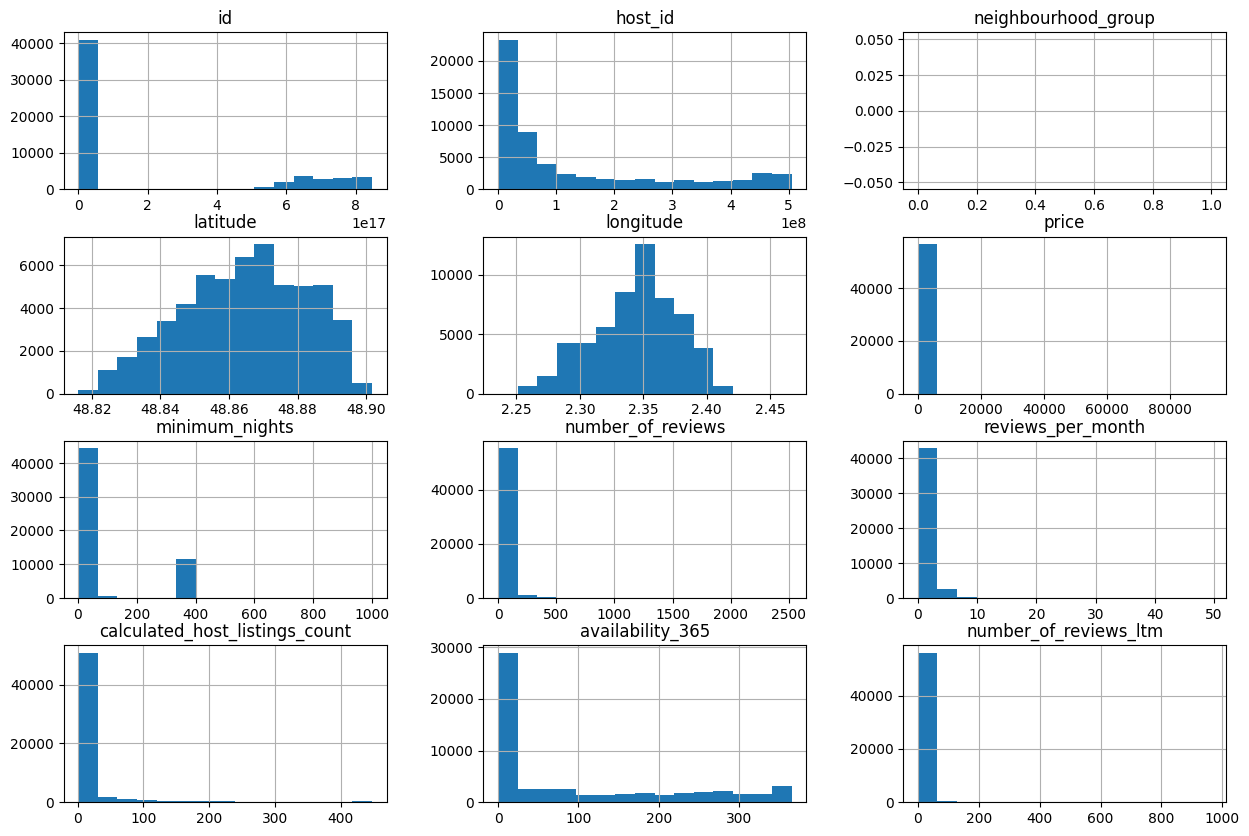

In [11]:
# plotar o histograma das variáveis numéricas
df_paris.hist(bins=15, figsize=(15,10));

Por meio da análise dos histogramas é possível identificar que em  alguns gráficos é possível melhorar as suas visualizações  por meio da eliminação de alguns outliers tornando assim a leitura dos gráficos melhores. Os gráficos das variáveis `price`, `minimum_nights` e `calculated_host_listings_count` são um bom exemplo desse tipo de caso.

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [16]:
# obtendo o resumo estatístico das variáveis numéricas 
df_paris[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,56726.000000,56726.000000,56726.000000,45631.000000,56726.000000,56726.000000
mean,171.991080,80.673571,24.800709,1.009644,15.104643,95.708670
std,598.279546,145.470062,54.452974,1.362947,51.584652,121.647134
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,73.000000,2.000000,1.000000,0.160000,1.000000,0.000000
50%,110.000000,3.000000,7.000000,0.520000,1.000000,21.000000
75%,180.000000,30.000000,24.000000,1.330000,2.000000,186.000000
max,93000.000000,1000.000000,2524.000000,49.550000,447.000000,365.000000


Com base no resumo estatísco acima, pode-se confirmar a existência de outlier tendo em vista que:

* A variável `price` possui 75% do valor abaixo de 180, porém seu valor máximo é 93000.
* A quantidade máxima da variável `minimum_nights` está acima de 365 dias no ano.

#### Boxplot para minimum_nights


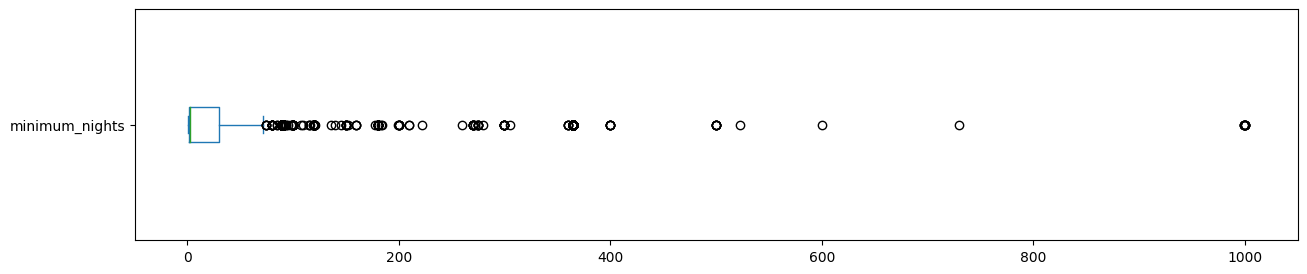

minimum_nights: valores acima de 60:
12393 entradas
21.8471%


In [18]:
# minimum_nights
df_paris.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 60:")
print("{} entradas".format(len(df_paris[df_paris.minimum_nights > 60])))
print("{:.4f}%".format((len(df_paris[df_paris.minimum_nights > 60]) / df_paris.shape[0])*100))

Ao plotar o Boxplot foi possível identificar visualmente os outliers. Contudo ao buscar identificar os outliers com valores acima de 60 dias tem-se que a porcentagem é alta, quase 22%. Assim se torna inviável eliminar.

Considerando isso será necessário fazer uma nova análise considerando um tempo maior de 365 dias (ano).

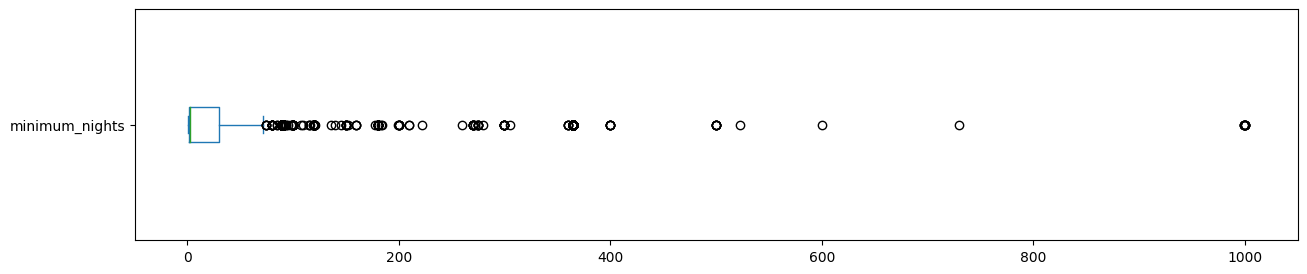

minimum_nights: valores acima de 365 dias:
24 entradas
0.0423%


In [20]:
# minimum_nights considerando um período de 365 dias
df_paris.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 365 dias (1 ano)  para minimum_nights    #algo acontece que para valores maiores que 350 a porcentagem é bem considerável
print("minimum_nights: valores acima de 365 dias:")
print("{} entradas".format(len(df_paris[df_paris.minimum_nights > 365])))
print("{:.4f}%".format((len(df_paris[df_paris.minimum_nights > 365]) / df_paris.shape[0])*100))

Tendo em vista que a porcentagem de outliers para o tempo de "corte" de 1 ano é menor que 1 %, logo considerou-se os valores maioresque 365 da coluna minimum_nigths  como sendo outliers.

#### Boxplot para price

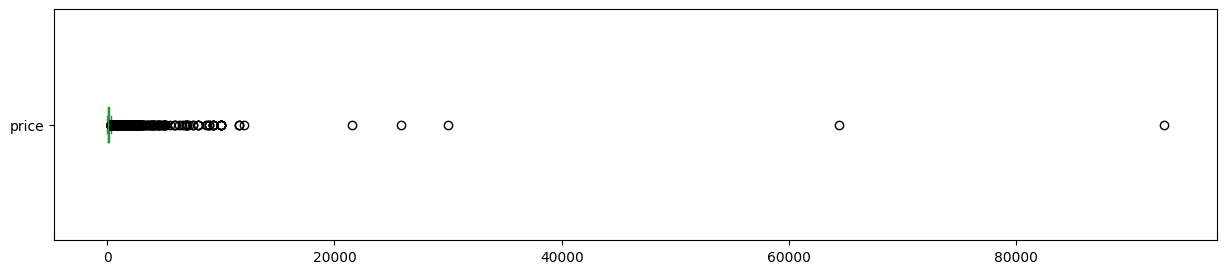


price: valores acima de 2.000
165 entradas
0.2909%


In [23]:
# price
df_paris.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2.000 para price
print("\nprice: valores acima de 2.000")
print("{} entradas".format(len(df_paris[df_paris.price > 2000])))
print("{:.4f}%".format((len(df_paris[df_paris.price > 2000]) / df_paris.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Dessa forma para a coluna de preço por noite `price` considerou-se como outliers valores acima de 2 mil.

#### Histogramas sem *outliers*

Após identificar os *outliers* nas variáveis `price` e `minimum_nights`, limpou-se o *DataFrame* e plotou-se novamente o histograma.

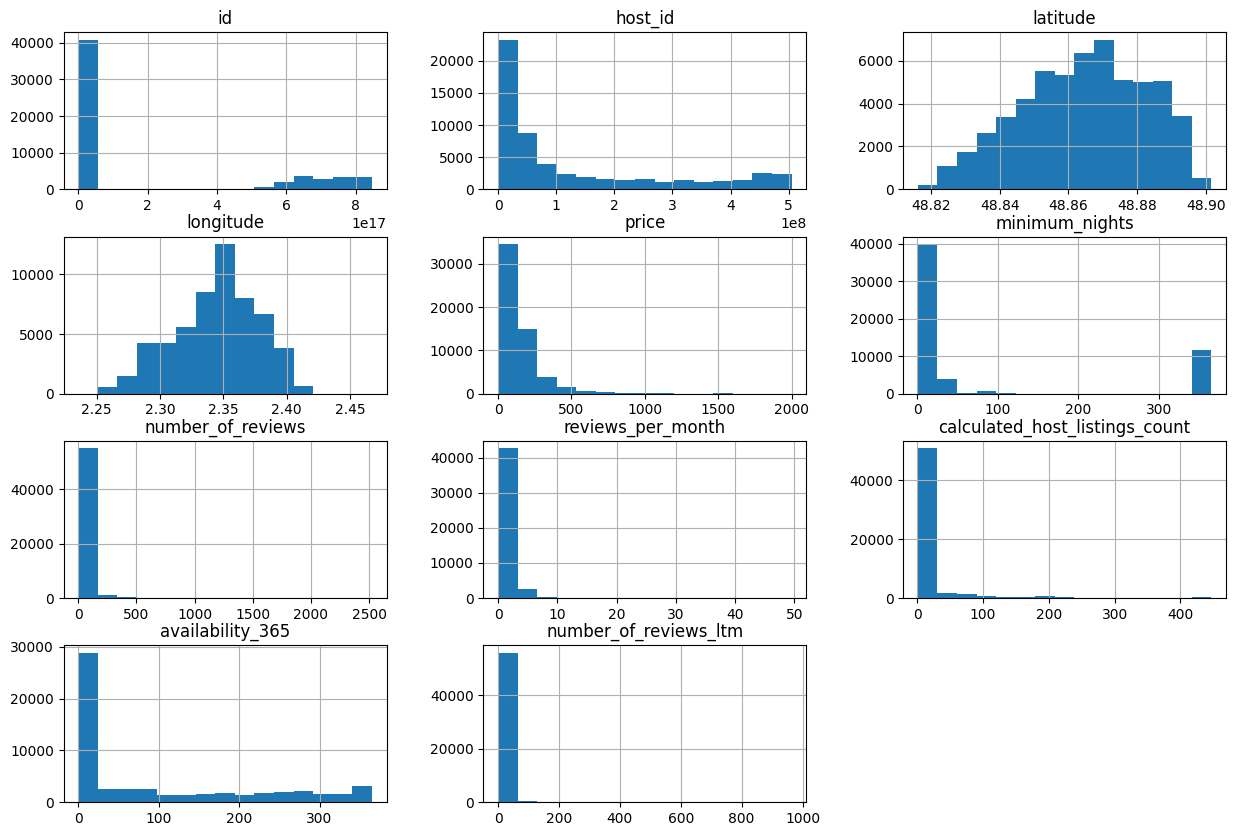

In [25]:
# removendo os *outliers* em um novo DataFrame
df_paris_clean = df_paris.copy() #criou-se um dataframe novo o df_paris_clean para armazenar os dados limpos
df_paris_clean.drop(df_paris_clean[df_paris_clean.price > 2000].index, axis=0, inplace=True)
df_paris_clean.drop(df_paris_clean[df_paris_clean.minimum_nights > 365].index, axis=0, inplace=True)

# removendo a coluna  `neighbourhood_group`, uma vez que está vazia
df_paris_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotando o histograma para as variáveis numéricas do dataframe limpo
df_paris_clean.hist(bins=15, figsize=(15,10));

Após com base nesses gráficos com os dados com uma organização visual melhor é possível identificar alguns pontos:

*  Grande parte  da quantidade  mínima de noite alugadas ficam abaixo de 2 meses, contudo tem uma quantidade expressiva de um pouco mais de 10 mil alugueis que fecham um perído que quase um ano  
*   Grande parcela dos inquilimos pagam 500 eurous ou menos .



### **Q4. Qual a correlação existente entre as variáveis**

Sabendo se que  significa que existe uma relação entre duas coisas. Desse forma , buscou-se a relação ou semelhança entre duas variáveis do Dataframe .

A correlação é algo que pode ser medido, e é função do coeficiente de correlação estabelecer qual a intensidade dessa correlação. Para identificar essa intensidade entre as variáveis de interesse fez-se 

* Criar uma matriz de correlação
* Gerar um mapa de calor a partir dessa matriz, usando a biblioteca `seaborn`

In [28]:
# criar uma matriz de correlação
corr = df_paris_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.189854,0.021623,0.086564,0.122417,0.255639
minimum_nights,-0.189854,1.000000,-0.177008,-0.294544,-0.094715,-0.181832
number_of_reviews,0.021623,-0.177008,1.000000,0.574928,-0.042527,0.080206
reviews_per_month,0.086564,-0.294544,0.574928,1.000000,0.059300,0.228647
calculated_host_listings_count,0.122417,-0.094715,-0.042527,0.059300,1.000000,0.194124
availability_365,0.255639,-0.181832,0.080206,0.228647,0.194124,1.000000


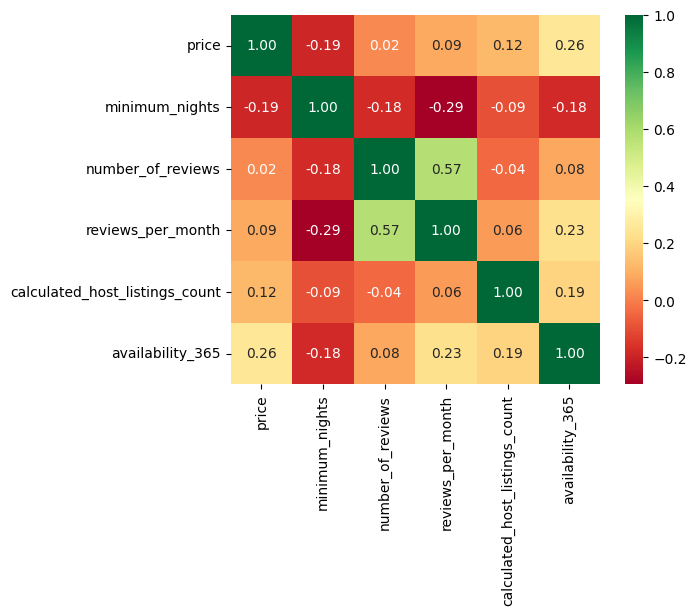

In [49]:
sns.heatmap(corr, cmap='RdYlGn', fmt='.2f', square=True, linecolor='white', annot=True);

Ao analinar o mapa de calor é possivel identificar que uma correlação negativa entre `reviews_per_month` e `minimum_nights` e uma correção positiva entre `availability_365` e `price`.


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**


In [53]:
# mostrar a quantidade de cada tipo de imóvel disponível
((df_paris_clean.room_type.value_counts()/df_paris_clean.shape[0])*100).sort_values(ascending=False)

Entire home/apt    85.222067
Private room       12.657198
Hotel room          1.614872
Shared room         0.505863
Name: room_type, dtype: float64

Dessa forma é possível verificar que 85% dos imóveis alugados são casas ou apartamentos inteiros. 

### **Q6. Qual a localidade mais cara de Paris?**

Ao agrupar por bairros e calcular o preço médio de cada grupos obtém-se o valor dos dados abaixo:

In [70]:
df_paris_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]


neighbourhood
Élysée                 271.000555
Louvre                 249.698295
Luxembourg             234.859618
Palais-Bourbon         234.720541
Bourse                 210.098551
Hôtel-de-Ville         206.179393
Passy                  200.661784
Temple                 195.218120
Opéra                  181.660069
Panthéon               179.019751
Vaugirard              145.177594
Entrepôt               142.298206
Batignolles-Monceau    141.307671
Popincourt             126.548054
Observatoire           122.390361
Buttes-Montmartre      115.066837
Reuilly                114.765826
Gobelins               111.978746
Buttes-Chaumont        101.149792
Ménilmontant            95.689193
Name: price, dtype: float64

Dessa forma é possível verificar que o bairro de Élysée é o maior caso. E faz sentido tendo em vista que é dominado por hotéis e apartamentos sofisticados e também por ser o bairro no qual encontra-se o Palácio Presidencial da França.

In [56]:
# verificando a análise estatística do bairro Élysée
df_paris_clean[df_paris_clean.neighbourhood == "Élysée"].describe()



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.801000e+03,1.801000e+03,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1339.000000,1801.000000,1801.000000,1801.000000
mean,2.340193e+17,1.796893e+08,48.874024,2.312609,271.000555,62.101610,24.288173,1.229798,38.021655,151.256524,8.671849
std,3.414973e+17,1.658896e+08,0.004166,0.009112,253.414999,127.579131,53.502396,1.526329,92.833214,130.307690,18.988345
min,2.215800e+04,2.750000e+02,48.864100,2.295800,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.566698e+07,2.831344e+07,48.871200,2.304450,110.000000,1.000000,0.000000,0.200000,1.000000,2.000000,0.000000
50%,4.367539e+07,1.132261e+08,48.873390,2.311880,196.000000,3.000000,4.000000,0.670000,2.000000,148.000000,1.000000
75%,6.461576e+17,3.149949e+08,48.876970,2.321600,340.000000,30.000000,24.000000,1.755000,17.000000,270.000000,9.000000
max,8.463336e+17,5.048540e+08,48.883211,2.327100,1976.000000,365.000000,772.000000,19.330000,447.000000,365.000000,452.000000


In [57]:
# verificando a análise estatística do bairro Louvre
df_paris_clean[df_paris_clean.neighbourhood == "Louvre"].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.349000e+03,1.349000e+03,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1100.000000,1349.000000,1349.000000,1349.000000
mean,2.069799e+17,1.599895e+08,48.863077,2.340824,249.698295,49.788732,36.949592,1.360973,26.256486,127.867309,11.168273
std,3.228853e+17,1.649141e+08,0.002580,0.006541,209.698367,115.994873,71.978394,1.537205,68.884764,122.870155,18.276698
min,9.359000e+03,2.842200e+04,48.855355,2.321580,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.959904e+07,1.859103e+07,48.861260,2.335960,119.000000,1.000000,2.000000,0.290000,1.000000,0.000000,0.000000
50%,4.122787e+07,6.994737e+07,48.863290,2.342100,198.000000,3.000000,11.000000,0.870000,2.000000,98.000000,3.000000
75%,5.947567e+17,3.121876e+08,48.864930,2.346370,304.000000,7.000000,38.000000,1.962500,13.000000,241.000000,15.000000
max,8.432902e+17,5.035368e+08,48.869660,2.350780,2000.000000,365.000000,947.000000,14.950000,447.000000,365.000000,171.000000


Ambos possuem um desvio padrão bem elevado. O que faz pensar numa hipóse: Será que o valor não está tão devido a disponibilidade em relação aos outros bairros?

In [71]:
#Verificando a disponíbilidade média dos bairros
df_paris_clean.groupby(['neighbourhood']).availability_365.mean().sort_values(ascending=False)[:20]
                                                                                            

neighbourhood
Élysée                 151.256524
Bourse                 135.036232
Passy                  134.163116
Louvre                 127.867309
Luxembourg             121.699522
Palais-Bourbon         118.300708
Hôtel-de-Ville         118.148013
Temple                 117.238295
Opéra                  108.094444
Batignolles-Monceau     97.665744
Panthéon                96.325884
Vaugirard               90.200708
Observatoire            87.462651
Entrepôt                81.217489
Gobelins                78.585547
Reuilly                 78.238601
Popincourt              77.986381
Buttes-Montmartre       73.310841
Buttes-Chaumont         69.772277
Ménilmontant            65.311125
Name: availability_365, dtype: float64

Ao avaliar verifica-se que o bairro mais caro é o que mais tem disponibilidade. Logo a hipótese de que ele é caro por ter menos disponibilidade torna-se inviável. Logo o que mais provavelmente interferindo aqui é justamente o fato de ser o bairro do Palácio da França.

Para melhorar avaliação de bairro vs preço plotou-se um gráfico de coordenadas geográficas vs preço. Para isso, considera-se `x=longitude` e `y=latitude`.

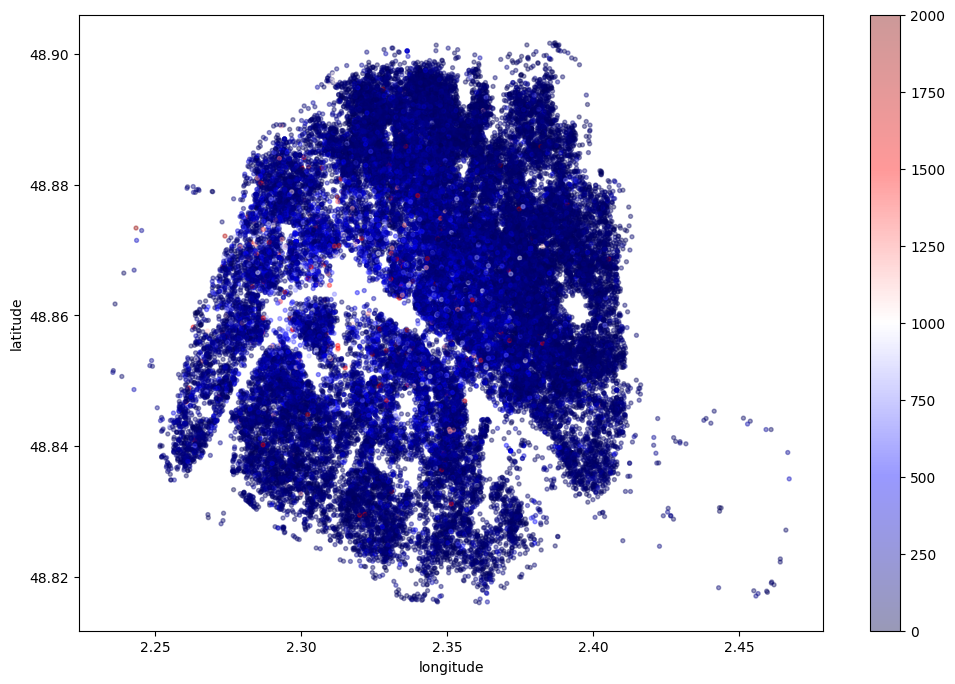

In [69]:
# plotar os imóveis pela latitude-longitude
df_paris_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_paris_clean['price'], s=8,
              cmap=plt.get_cmap('seismic'), figsize=(12,8));

## Conclusões

Por meio das análises superfíciais do banco de dados do Airbnb da cidade de  Paris verificou-se que 85% dos imóveis alugados são casas ou apartamentos inteiros e que existe cerca de 22% de alugueis por temporadas maiores que dois meses.

Também foi observado que existe uma leve correlação positiva entre preço pago em relação a disponibilidade o que significa que os imóveis mais caros tem uma disponibilidade maior. Isso foi confirmado quando se constata que o bairro de Elysee é o mais caro não por falta de disponibilidade, uma vez que  ele é o bairro  com maior disponibilidade durante o ano. Também se constatou que o Elysee possivelmente é o bairro mais caro por residir o Palácio da França.

Dessa forma tem-se que seria muito mais vantajoso ao viajar a Paris alugar apartamento no Bairro  Ménilmontant uma vez que é 65% mais barato que o Elysee. Contudo é importante estar atendo visto que o Ménilmontant tem cerca de 65 dias em média disponíveis por ano devido ao seu preço mais atrativo e por ser uma bairro que atrai bastante estudante de Paris.
